# The Basics: Numpy and Matplotlib

Python is amazing! It provides a data science platform that is flexible, powerful, and easy to use. In this demo, we're going to do some simple data processing with `numpy` and `matplotlib`, two of the most essential packages for data science in Python.

## Installation

It is recommended that you use Python 3. Downloadable binaries are available 
[here](https://www.python.org/downloads/), 

### For Mac Users 
Please install [Homebrew](https://brew.sh/) and once installed run the following in a terminal:
```
brew install -U python3
```
to install Python 3.  If you are using a different work environment or have issues please come to the Wednesday office hours.

Once you have Python3 installed, the packages needed for this class can be installed using `pip`. Run
```
python3 -m pip install -U jupyter numpy scipy matplotlib scikit-learn
```
to install the packages you will need for homework 1, including jupyter notebook. You can then launch a jupyter notebook with
```
jupyter notebook
```

## Imports

All your import statements should be at the beginning of the file in one cell. Preferrably, you should use the common abbreviations for each.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline

In [10]:
# Global variables or definitions used throughout should be defined near the top as well
np.set_printoptions(threshold=25)  # this is to have nicer print outs.

## Demo

Let's make some data. In this example, we will draw 100 points on the plane from two normal distributions, each with standard deviation of 1.

In [11]:
X1 = np.random.normal(loc=[-2,0], scale=[1,1], size=[100,2])
X2 = np.random.normal(loc=[2,0], scale=[1,1], size=[100,2])
print("X1:", X1)
print(f"X2: {X2}") # f strings are a python 3 thing.

X1: [[-3.11350583  0.18495975]
 [-0.53194059  0.25067932]
 [-2.10163498 -0.4713688 ]
 ...
 [-3.2982044  -0.10357481]
 [-1.61394632  0.04295917]
 [-2.05437385  0.16285739]]
X2: [[ 2.63662444 -0.07559307]
 [ 0.65654693 -0.57509447]
 [ 0.73913396  0.79443324]
 ...
 [ 0.98817174 -0.11909176]
 [ 1.77006887 -0.37322929]
 [ 2.38368231  1.03348477]]


Important sidenote about numpy arrays: they have a shape. Each entry in the shape is an "axis," starting at 0.

In [12]:
print(X1.shape)

(100, 2)


Now, let's plot this data. `plt.plot` is a very versatile function that you will use almost every time you 
want to plot something. In a basic usage, it takes the `X`s, the `Y`s, and an optional format string. Matplotlib lets you call `plot` multiple times to plot onto the same figure.

Full documentation [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html).

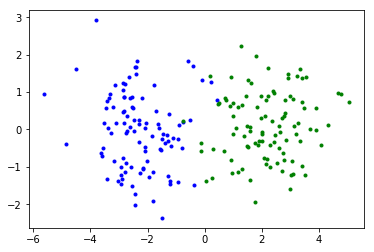

In [16]:
# plt.plot is taking in all of x values, y values, and color as the 3 arguments.
plt.plot(X1[:,0], X1[:,1], 'b.')
plt.plot(X2[:,0], X2[:,1], 'g.')
plt.show() # use this line to display the results

Say I wanted to plot the points that have a positive `y` value differently from those with a negative `y` value (for whatever reason). Numpy has great tools for slicing to be able to do this. In particular, we can grab the indices where this is true:

In [17]:
X1_positive = X1[:,1] > 0.
X2_positive = X2[:,1] > 0.

print("X1 positive:", X1_positive)
print("X1 negative:", np.logical_not(X1_positive))

X1 positive: [ True  True False ... False  True  True]
X1 negative: [False False  True ...  True False False]


And we can plot each set of points separately:

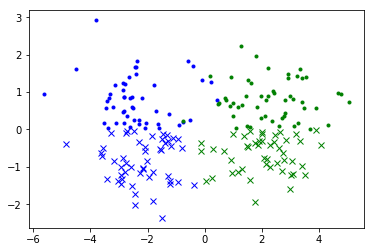

In [18]:
plt.plot(X1[X1_positive,0], X1[X1_positive,1], 'b.')
plt.plot(X1[np.logical_not(X1_positive),0], X1[np.logical_not(X1_positive),1], 'bx')

plt.plot(X2[X2_positive,0], X2[X2_positive,1], 'g.')
plt.plot(X2[np.logical_not(X2_positive),0], X2[np.logical_not(X2_positive),1], 'gx')

plt.show()

If we wanted all the indices at which this were true, we could get:

In [19]:
X1_indices, = np.where(X1[:,1] > 0)
print(X1_indices)

[ 0  1  3 ... 96 98 99]


Now, let's combine both sets into one array and shuffle it, so we don't know which point belongs to which distribution.

In [20]:
X = np.concatenate((X1,X2), axis=0) # add rows (axis 0) of X2 after rows of X1
np.random.shuffle(X)    # shuffle the first axis of X in place
print(X)

[[-3.5216428   0.16592805]
 [ 2.54441953 -0.88440237]
 [-0.39396736 -1.49356277]
 ...
 [ 0.48079178  0.69010519]
 [-2.94413541 -1.46869752]
 [-1.63075821  0.13785663]]


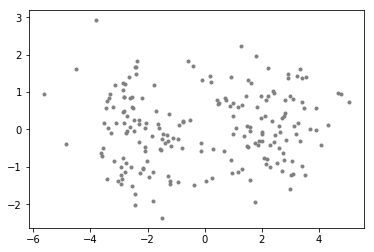

In [21]:
plt.plot(X[:,0], X[:,1], color='gray', marker='.', linestyle='')
plt.show()

We can run k-means clustering on the data like so:

In [22]:
kmeans = KMeans(n_clusters=2, n_jobs=-1)
kmeans.fit(X)
labels = kmeans.predict(X)
print(labels)

[0 1 0 ... 1 0 0]


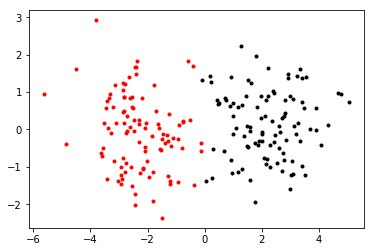

In [23]:
plt.plot(X[labels == 0,0], X[labels == 0, 1], 'r.')
plt.plot(X[labels == 1,0], X[labels == 1, 1], 'k.')
plt.show()

## Useful Tricks for Linear Algebra

Numpy and SciPy have lots of great features for linear algebra. Here are a few.

In [24]:
a = np.array([np.pi, 2, 5])
b = np.array([np.e, 0, 3])
I = np.identity(3)
J = np.ones_like(I)

print("a =", a)
print("b =", b)
print("I =", I)
print("J =", J)

a = [3.14159265 2.         5.        ]
b = [2.71828183 0.         3.        ]
I = [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
J = [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [25]:
# Dot product:
np.dot(a,b)

23.539734222673566

In [26]:
# Or, in python 3:
a @ b

23.539734222673566

In [27]:
# Matrix multiplication:
J @ a

array([10.14159265, 10.14159265, 10.14159265])

In [29]:
# outer product:
M = np.outer(a,b)
print(M)

[[ 8.53973422  0.          9.42477796]
 [ 5.43656366  0.          6.        ]
 [13.59140914  0.         15.        ]]


In [30]:
# transpose:
M.T

array([[ 8.53973422,  5.43656366, 13.59140914],
       [ 0.        ,  0.        ,  0.        ],
       [ 9.42477796,  6.        , 15.        ]])

In [31]:
# inverse:
try:
    out = np.linalg.inv(M) # raises an error if M not inversible
except:
    print("error: M not inversible")
    out = np.linalg.pinv(M)
out

error: M not inversible


array([[0.01340542, 0.00853415, 0.02133538],
       [0.        , 0.        , 0.        ],
       [0.01479473, 0.00941862, 0.02354655]])

In [32]:
# eigenvalue problems:
w, v = np.linalg.eig(M)
print("Sorted eigenvalues:", w)
print("Eigenvector matrix:", v)

Sorted eigenvalues: [0.00000000e+00 1.77635684e-15 2.35397342e+01]
Eigenvector matrix: [[ 0.         -0.66281034 -0.50390053]
 [ 1.          0.4472136  -0.32079304]
 [ 0.          0.60056844 -0.8019826 ]]


In [33]:
# vector norm
np.linalg.norm(a)

6.234549254043099

In [34]:
# frobenius norm
np.linalg.norm(M)

25.239574621468865

In [35]:
# row-wise norm
np.linalg.norm(M, axis=1)

array([12.71823495,  8.09667984, 20.24169959])

In [36]:
# Simple mathematical expressions are applied to each element
2*M + 1

array([[18.07946845,  1.        , 19.84955592],
       [11.87312731,  1.        , 13.        ],
       [28.18281828,  1.        , 31.        ]])

In [37]:
# Element-wise squaring
M**2

array([[ 72.92706059,   0.        ,  88.82643961],
       [ 29.5562244 ,   0.        ,  36.        ],
       [184.72640247,   0.        , 225.        ]])

In [38]:
# reshaping arrays is pretty important:
# It can be useful for outer products or tensor products for example.
a_reshaped = a.reshape(-1,1)
print(a_reshaped)
print(a_reshaped.shape)

[[3.14159265]
 [2.        ]
 [5.        ]]
(3, 1)


In [108]:
M.reshape(-1)

array([ 8.53973422,  0.        ,  9.42477796,  5.43656366,  0.        ,
        6.        , 13.59140914,  0.        , 15.        ])